# ***Multiple Linear Regression***

In [ ]:
# Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
emission_data = pd.read_csv("/content/CO2Emission_data.csv")

In [ ]:
emission_data.head(10)

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


***Data Analysis***

In [ ]:
emission_data.shape

(36, 5)

In [ ]:
emission_data.isnull().sum()

Car       0
Model     0
Volume    0
Weight    0
CO2       0
dtype: int64

In [ ]:
emission_data.duplicated().sum()

0

In [ ]:
emission_data.dropna()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


In [ ]:
emission_data.describe()

,Volume,Weight,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


In [ ]:
emission_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


***Data Visualizaton***

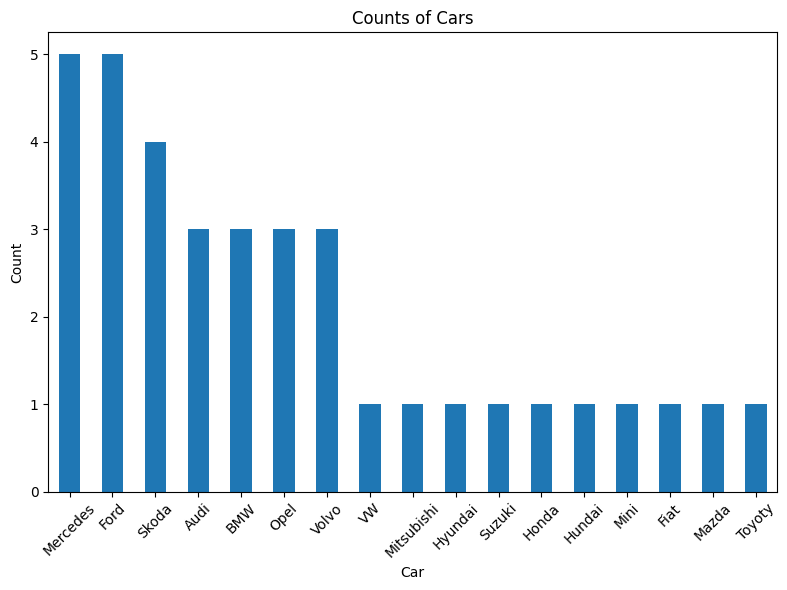

In [ ]:
car_counts = emission_data['Car'].value_counts()
# Plotting the counts
plt.figure(figsize=(8, 6))
car_counts.plot(kind='bar')
plt.xlabel('Car')
plt.ylabel('Count')
plt.title('Counts of Cars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

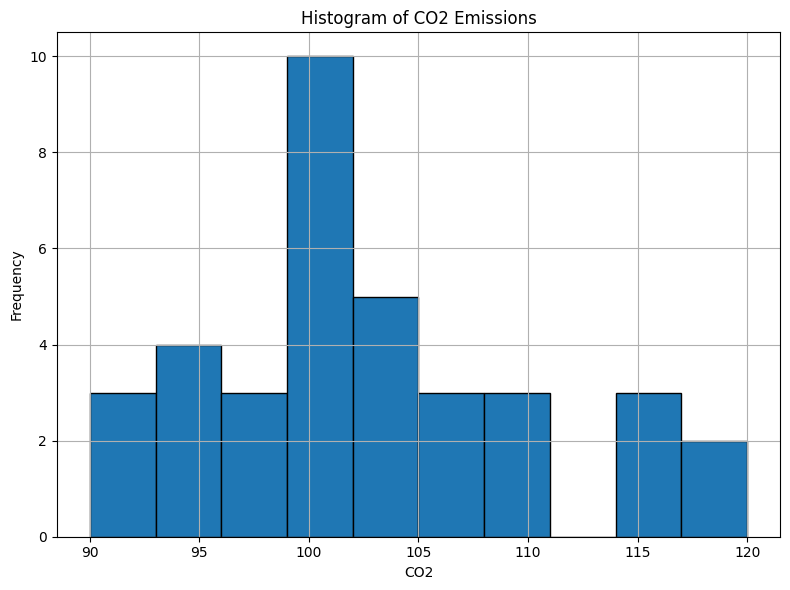

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(emission_data['CO2'], bins=10, edgecolor='black')
plt.xlabel('CO2')
plt.ylabel('Frequency')
plt.title('Histogram of CO2 Emissions')
plt.grid(True)
plt.tight_layout()
plt.show()

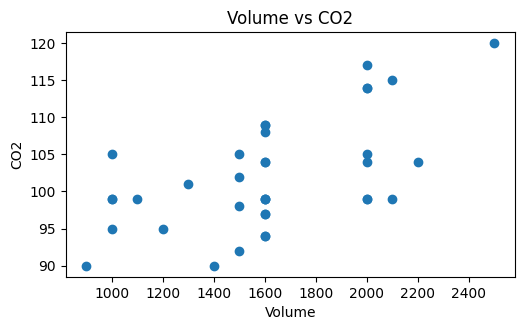

In [ ]:
plt.figure(figsize=(10, 6))

# Volume vs CO2
plt.subplot(2, 2, 1)
plt.scatter(emission_data['Volume'], emission_data['CO2'])
plt.xlabel('Volume')
plt.ylabel('CO2')
plt.title('Volume vs CO2')
plt.tight_layout()
plt.show()

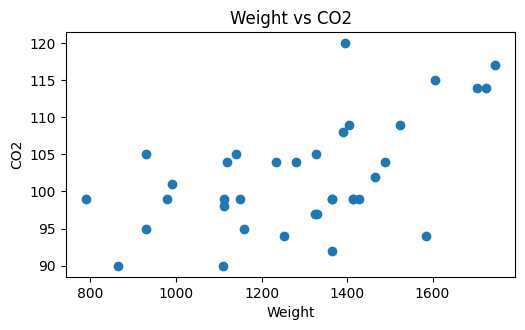

In [ ]:
plt.figure(figsize=(10, 6))
# Weight vs CO2
plt.subplot(2, 2, 2)
plt.scatter(emission_data['Weight'], emission_data['CO2'])
plt.xlabel('Weight')
plt.ylabel('CO2')
plt.title('Weight vs CO2')
plt.tight_layout()
plt.show()

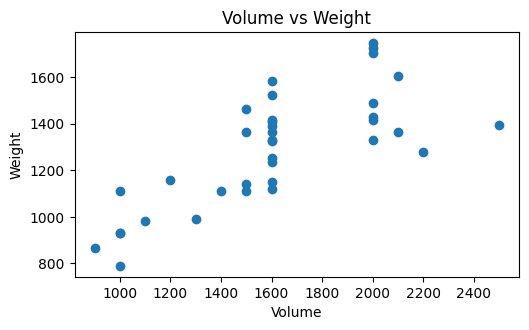

In [ ]:
plt.figure(figsize=(10, 6))
# Volume vs Weight
plt.subplot(2, 2, 3)
plt.scatter(emission_data['Volume'], emission_data['Weight'])
plt.xlabel('Volume')
plt.ylabel('Weight')
plt.title('Volume vs Weight')
plt.tight_layout()
plt.show()

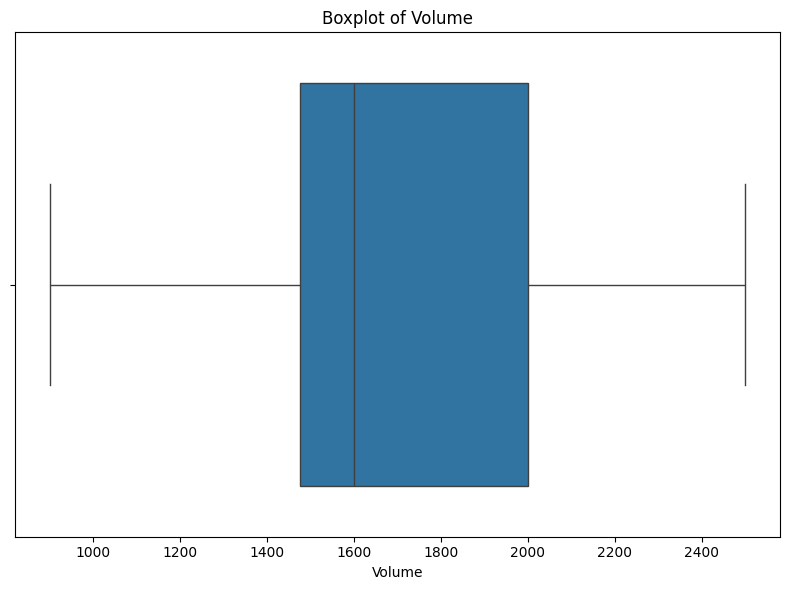

In [ ]:
#Volume
plt.figure(figsize=(8, 6))
sns.boxplot(x=emission_data['Volume'])
plt.title('Boxplot of Volume')
plt.xlabel('Volume')
plt.tight_layout()
plt.show()

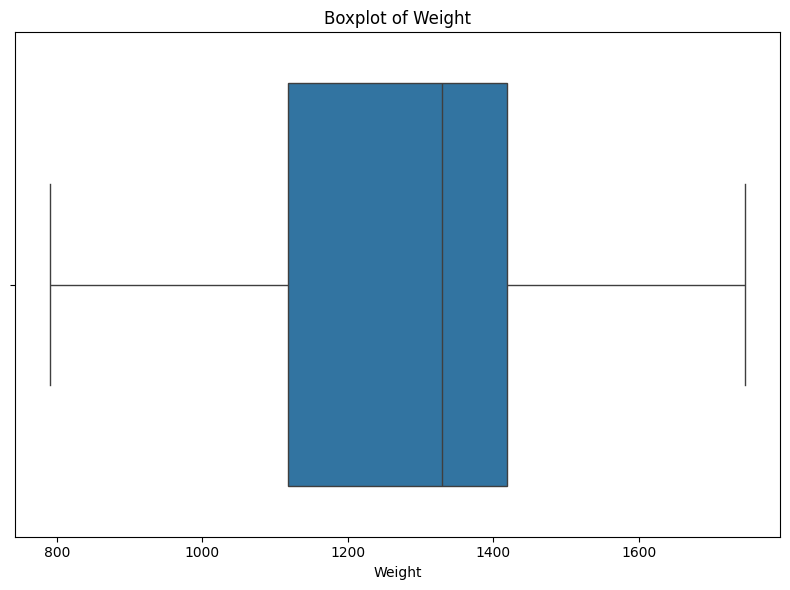

In [ ]:
#Weight
plt.figure(figsize=(8, 6))
sns.boxplot(x=emission_data['Weight'])
plt.title('Boxplot of Weight')
plt.xlabel('Weight')
plt.tight_layout()
plt.show()

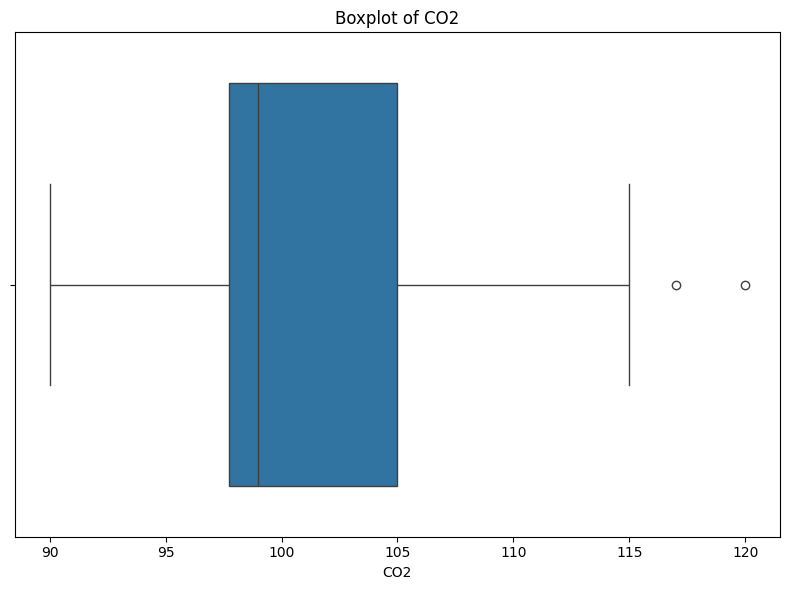

In [ ]:
#CO2
plt.figure(figsize=(8, 6))
sns.boxplot(x=emission_data['CO2'])
plt.title('Boxplot of CO2')
plt.xlabel('CO2')
plt.tight_layout()
plt.show()

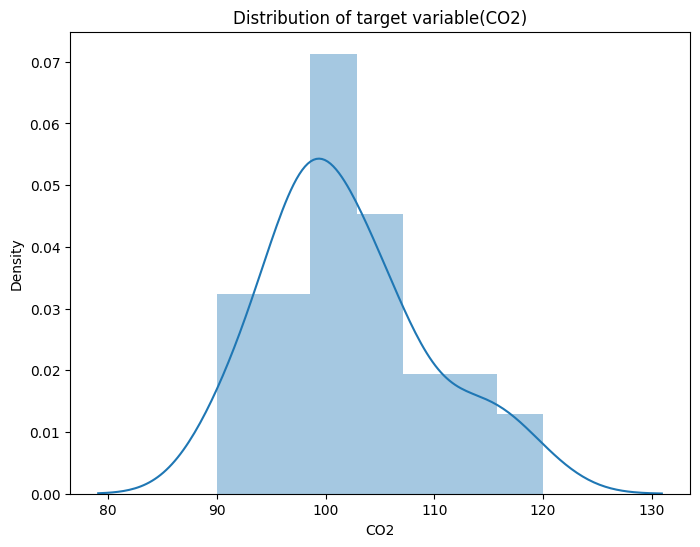

In [ ]:
# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.distplot(emission_data['CO2'])
plt.title("Distribution of target variable(CO2)")
plt.show()

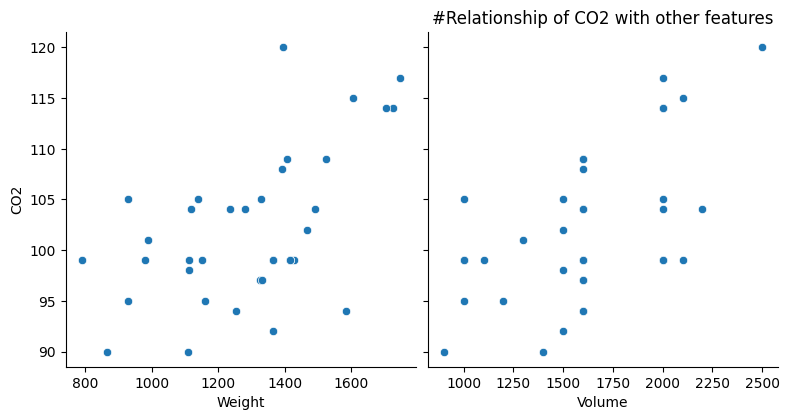

In [ ]:
#Relationship of CO2 with other features
sns.pairplot(emission_data, x_vars=['Weight', 'Volume'], y_vars='CO2', height=4, aspect=1, kind='scatter')
plt.title("#Relationship of CO2 with other features")
plt.show()

In [ ]:
correlation = emission_data.corr()
correlation

,Volume,Weight,CO2
Volume,1.000000,0.753537,0.592082
Weight,0.753537,1.000000,0.552150
CO2,0.592082,0.552150,1.000000


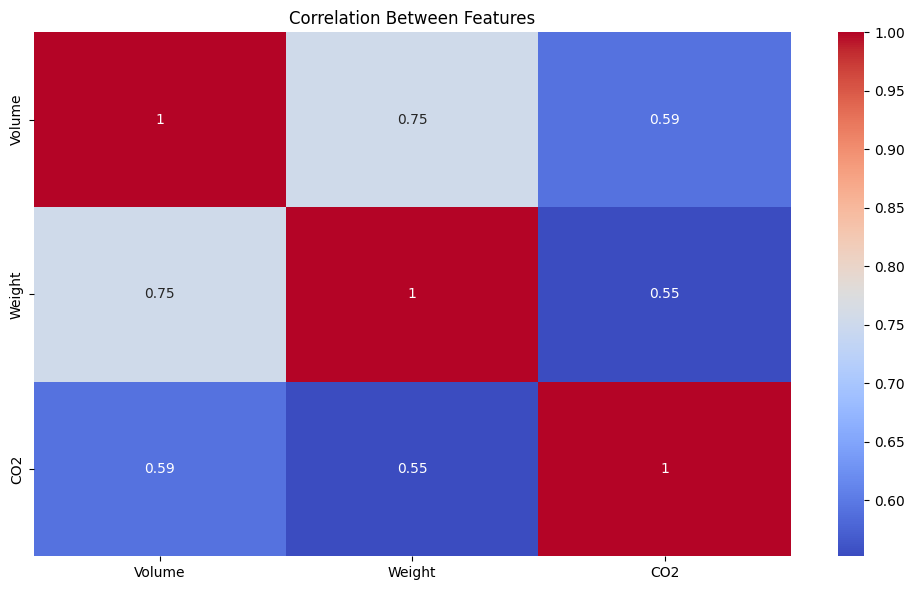

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
plt.title("Correlation Between Features")
plt.tight_layout()
plt.show()

***Model Building***

In [ ]:
X = emission_data[['Weight', 'Volume']].values
X

array([[ 790, 1000],
       [1160, 1200],
       [ 929, 1000],
       [ 865,  900],
       [1140, 1500],
       [ 929, 1000],
       [1109, 1400],
       [1365, 1500],
       [1112, 1500],
       [1150, 1600],
       [ 980, 1100],
       [ 990, 1300],
       [1112, 1000],
       [1252, 1600],
       [1326, 1600],
       [1330, 1600],
       [1365, 1600],
       [1280, 2200],
       [1119, 1600],
       [1328, 2000],
       [1584, 1600],
       [1428, 2000],
       [1365, 2100],
       [1415, 1600],
       [1415, 2000],
       [1465, 1500],
       [1490, 2000],
       [1725, 2000],
       [1523, 1600],
       [1705, 2000],
       [1605, 2100],
       [1746, 2000],
       [1235, 1600],
       [1390, 1600],
       [1405, 1600],
       [1395, 2500]])

In [ ]:
Y = emission_data['CO2'].values
Y

array([ 99,  95,  95,  90, 105, 105,  90,  92,  98,  99,  99, 101,  99,
        94,  97,  97,  99, 104, 104, 105,  94,  99,  99,  99,  99, 102,
       104, 114, 109, 114, 115, 117, 104, 108, 109, 120])

In [ ]:
# Splitting Dataset
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

In [ ]:
mlr_model = LinearRegression()

In [ ]:
mlr_model.fit(X_train , Y_train)

LinearRegression()

In [ ]:
y_pred = mlr_model.predict(X_test)
y_pred

array([106.69078079, 101.32216645, 104.96528686, 106.27600726,
       102.1364593 , 106.81005652, 104.51850671,  97.42121635,
        99.83129276, 104.41602982, 100.58714104])

***Evaluate Model***

In [ ]:
# Evaluate the model
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
print('\nRoot Mean Square Error:', r2)
# Print the coefficients
print("\nCoefficients:", mlr_model.coef_)
print("\nIntercept:", mlr_model.intercept_)

Mean Squared Error: 41.85943595384499

Root Mean Square Error: 6.469886857885923

Coefficients: [0.00720613 0.00482015]

Intercept: 84.58784534640243


In [ ]:
#Printing the model coefficients
print('Intercept: ',mlr_model.intercept_)
# pair the feature names with the coefficients
print("\n")
list(zip(X, mlr_model.coef_))

Intercept:  84.58784534640243




[(array([ 790, 1000]), 0.00720613145615111),
 (array([1160, 1200]), 0.004820152824129132)]

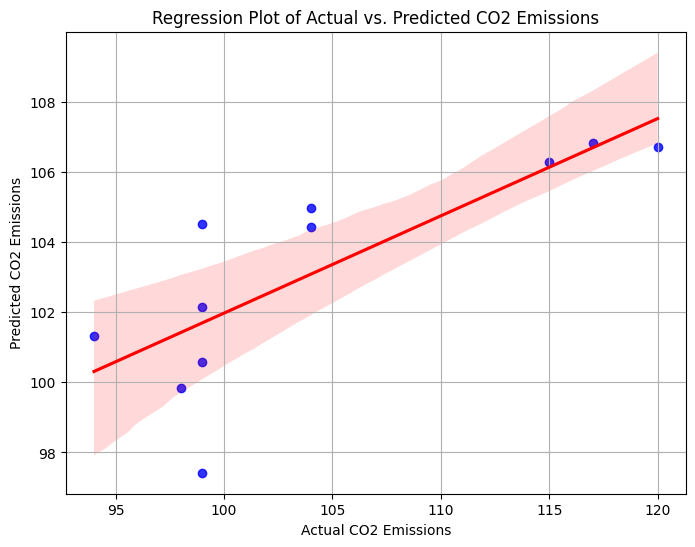

In [ ]:
# Visualize the predictions using a regression plot
plt.figure(figsize=(8, 6))
sns.regplot(x=Y_test, y=y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Regression Plot of Actual vs. Predicted CO2 Emissions')
plt.grid(True)
plt.show()

In [ ]:
model_diff = pd.DataFrame({'Actual value': Y_test.flatten() , 'Predicted value': y_pred.flatten()})
model_diff

,Actual value,Predicted value
0,120,106.690781
1,94,101.322166
2,104,104.965287
3,115,106.276007
4,99,102.136459
5,117,106.810057
6,99,104.518507
7,99,97.421216
8,98,99.831293
9,104,104.416030


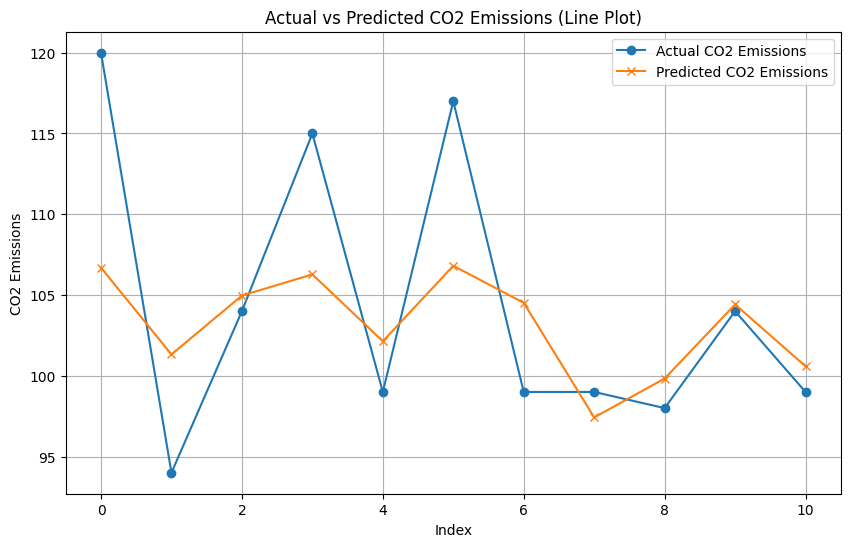

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(model_diff['Actual value'], label='Actual CO2 Emissions', marker='o')
plt.plot(model_diff['Predicted value'], label='Predicted CO2 Emissions', marker='x')
plt.xlabel('Index')
plt.ylabel('CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions (Line Plot)')
plt.legend()
plt.grid(True)
plt.show()

***Regression Plot for actual and predicted value***



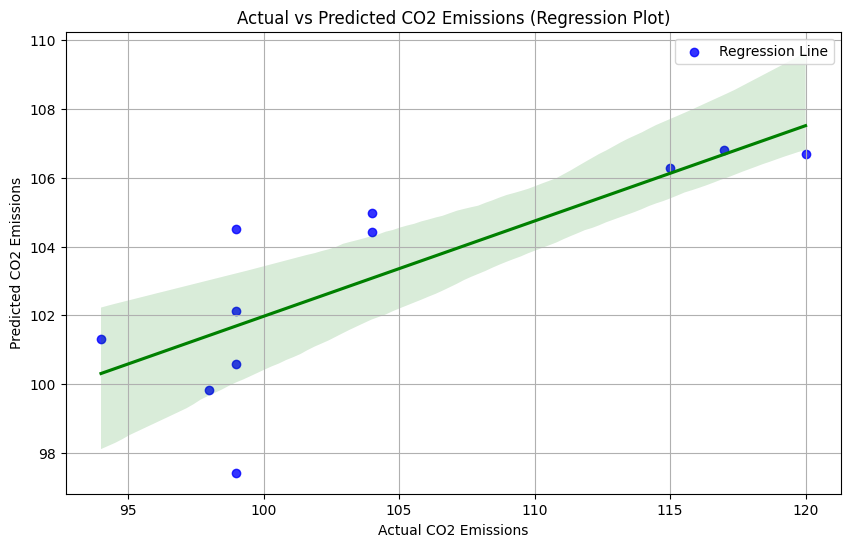

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Actual value', y='Predicted value', data=model_diff, scatter_kws={"color": "blue"}, line_kws={"color": "green"}, label='Regression Line')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions (Regression Plot)')
plt.legend()
plt.grid(True)
plt.show()

***END***